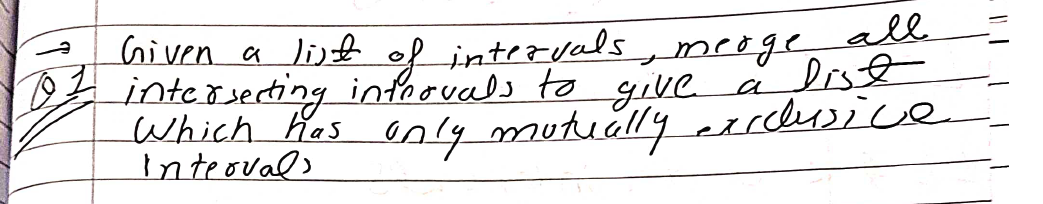

https://leetcode.com/problems/merge-intervals/description/

In [ ]:
class Solution {
public:
    vector<vector<int>> merge(vector<vector<int>>& intervals) {
       sort(intervals.begin(),intervals.end());
       vector<vector<int>> merged;
        for(auto interval:intervals){
            if(merged.empty() or merged.back()[1]<interval[0]){
                merged.push_back(interval);
            }
            else{
                merged.back()[1]=max(merged.back()[1],interval[1]);
            } 
        }
       return merged;
    }
};

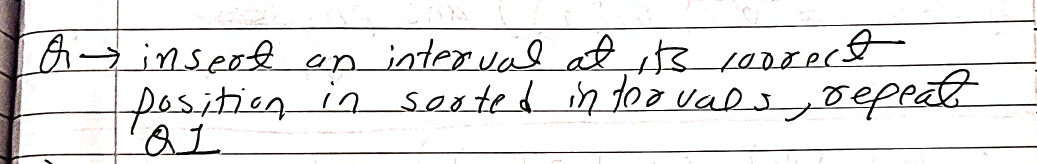

https://leetcode.com/problems/insert-interval/description/

without using the fact the array is sorted

In [ ]:
void insertInterval(vector<vector<int>>& intervals, vector<int>& newInterval){
    bool flag=0;
    int n=intervals.size();
    for(int i=0;i<n;i++){
        if(newInterval[0]<intervals[i][0]){
            intervals.insert(intervals.begin()+i,newInterval);
            flag=1;
            break;
        }
    }
    if(!flag){
        intervals.push_back(newInterval);
    } 
}

vector<vector<int>> merge(vector<vector<int>>& intervals) {
   vector<vector<int>> merged;
    for(auto interval:intervals){
        if(merged.empty() or merged.back()[1]<interval[0]){
            merged.push_back(interval);
        }
        else{
            merged.back()[1]=max(merged.back()[1],interval[1]);
        } 
    }
   return merged;
}


vector<vector<int>> insert(vector<vector<int>>& ma, vector<int>& newInterval) {
    insertInterval(ma,newInterval);
    return merge(ma);
}

using binary search to insert the element

In [ ]:
void insertInterval(vector<vector<int>>& intervals, vector<int>& newInterval){
    bool flag=0;
    int n=intervals.size();
    for(int i=0;i<n;i++){
        if(newInterval[0]<intervals[i][0]){
            intervals.insert(intervals.begin()+i,newInterval);
            flag=1;
            break;
        }
    }
    if(!flag){
        intervals.push_back(newInterval);
    } 
}

void insertInterval(vector<vector<int>>& intervals, vector<int>& newInterval){
    vector<int> tmp={newInterval[0],INT_MIN};
    intervals.insert(upper_bound(intervals.begin(),intervals.end(),tmp),newInterval);
}

void insertInterval(vector<vector<int>>& intervals, vector<int>& newInterval){
    vector<int> tmp={newInterval[0],INT_MAX};
    intervals.insert(lower_bound(intervals.begin(),intervals.end(),tmp),newInterval);
}

In [ ]:
void insertInterval(vector<vector<int>>& intervals, vector<int>& newInterval){
    vector<int> tmp={newInterval[0],INT_MIN};
    intervals.insert(upper_bound(intervals.begin(),intervals.end(),tmp),newInterval);
}

vector<vector<int>> merge(vector<vector<int>>& intervals) {
    if(intervals.size()==0) return {};
    sort(intervals.begin(),intervals.end());
    vector<vector<int>> merged;
    for(auto interval:intervals){
        if(merged.empty() or merged.back()[1]<interval[0])
            merged.push_back(interval);
        else merged.back()[1]=max(merged.back()[1],interval[1]);
    }
    return merged;
}


vector<vector<int>> insert(vector<vector<int>>& ma, vector<int>& newInterval) {
    insertInterval(ma,newInterval);
    return merge(ma);
}

# Maang

https://leetcode.com/problems/count-integers-in-intervals/?envType=list&envId=ppzcw7vd

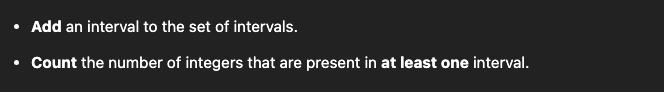

In [ ]:
class CountIntervals {
    public:
        CountIntervals() {
            
        }
        
        void add(int left, int right) {
            
        }
        
        int count() {
            
        }
    };

using the above strategy is too slow

In [ ]:
class CountIntervals {
    vector<vector<int>> intervals;
    int ans;

    void insertInterval(vector<int>& ni){
        vector<int> tmp={ni[0],INT_MIN};
        intervals.insert(upper_bound(intervals.begin(),intervals.end(),tmp),ni);
    }

        void merge() {
            ans=0;
            vector<vector<int>> merged;
            for(auto interval:intervals){
                if(merged.empty() or merged.back()[1]<interval[0]){
                    merged.push_back(interval);
                    ans+=interval[1]-interval[0]+1;
                }    
                else{
                ans -= merged.back()[1];
                merged.back()[1] = max(merged.back()[1], interval[1]);
                ans += merged.back()[1];
                } 
            }
            intervals=merged;
    }

public:
    CountIntervals() {
        ans=0;        
    }
    
    void add(int l, int r) {
        vector<int> tmp={l,r};
        insertInterval(tmp);
        merge();        
    }
    
    int count() {
        return ans;
    }
};

/**
 * Your CountIntervals object will be instantiated and called as such:
 * CountIntervals* obj = new CountIntervals();
 * obj->add(left,right);
 * int param_2 = obj->count();
 */

too memory heavy

In [ ]:
class CountIntervals {
    unordered_set<int> se;
public:
    CountIntervals() {
        
    }
    
    void add(int l, int r) {
        for(int i=l;i<=r;i++) se.insert(i);
    }
    
    int count() {
        return se.size();
    }
};

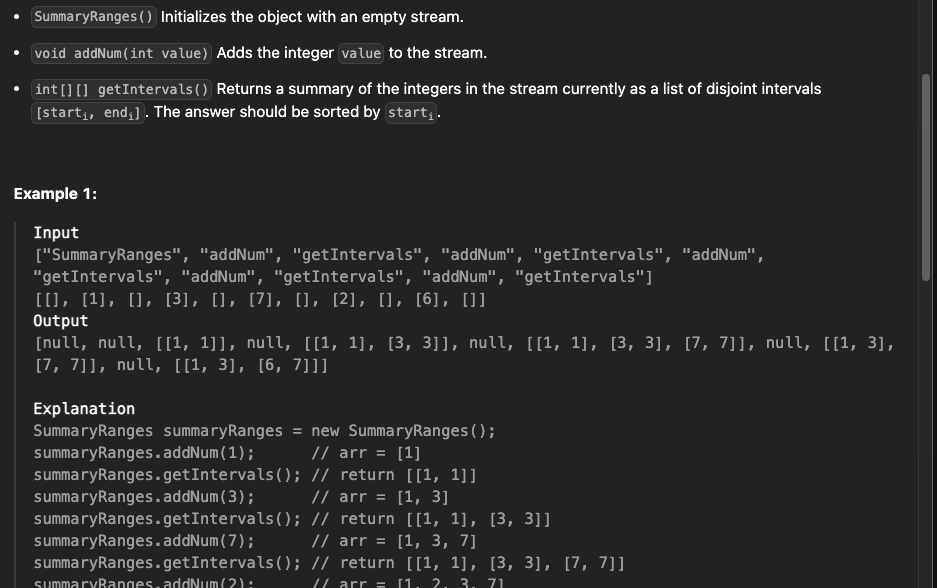

https://leetcode.com/problems/data-stream-as-disjoint-intervals/description/

brute force

In [ ]:
class SummaryRanges {
    set<int> se;
public:
    SummaryRanges() {
        se.clear(); 
    }
    
    void addNum(int value) {
        //logn
        se.insert(value);
    }
    
    vector<vector<int>> getIntervals() {
        //n
        if(se.empty()) return {};
        vector<vector<int>> ans;
        vector<int> v(se.begin(), se.end());
        //order n operation 
        int n = v.size();
        for(int i=0;i<n;i++){
            int l=v[i];
            while(i<n-1 && v[i]+1==v[i+1]){
                i++;
            }
            ans.push_back({l, v[i]});
        }
        return ans;
        
    }
};

see another method for solving it in    
https://youtu.be/Lh0PXb3Hqik?si=x7NB7LBykGc3b7xr

In [ ]:

//archieve
int left = -1, right = -1;
for (int x : se) {
    if(left == -1){
        left = right = x;
    } 
    else if(x == right + 1){
        right = x;
    } 
    else{
        ans.push_back({left, right});
        left = right = x;
    }
}